<a href="https://colab.research.google.com/github/Ayben06/CustomerSegmentation/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram , ward

In [2]:
data=pd.read_csv("/content/customer_segmentation_data.csv")

In [3]:
data.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [4]:
legend=pd.read_excel("/content/Segmentation data legend.xlsx")

In [5]:
mask=(legend.iloc[:,4].isnull())
mask

0      True
1      True
2     False
3     False
4      True
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: Unnamed: 4, dtype: bool

In [6]:
legned=legend[~mask].iloc[:,1:]
legend

,Unnamed: 0,Segmentation data - Legend,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,The dataset consists of student information of...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,Variable,Data type,Range,Description
3,NaN,minutes watched,numerical,Integer,The number of minutes a student has watched si...
4,NaN,NaN,NaN,NaN,NaN
5,NaN,CLV,numerical,Integer,"The Customer Lifetime Value, or CLV, shows the..."
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,Region,categorical,"{0,1, 2}",This is the geographical region where the stud...
9,NaN,NaN,NaN,0,"USA, Canada, United Kingdom, Australia"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [8]:
data.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [9]:
data.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [10]:
mask=data["minutes_watched"].isnull()
data['minutes_watched'][mask]

215    NaN
368    NaN
470    NaN
545    NaN
764    NaN
        ..
3809   NaN
3813   NaN
3816   NaN
3822   NaN
3833   NaN
Name: minutes_watched, Length: 109, dtype: float64

In [11]:
data['minutes_watched'].fillna(0,inplace=True)
data['minutes_watched'][mask]

215     0.0
368     0.0
470     0.0
545     0.0
764     0.0
       ... 
3809    0.0
3813    0.0
3816    0.0
3822    0.0
3833    0.0
Name: minutes_watched, Length: 109, dtype: float64

In [12]:
data.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


In [13]:
data['region'].value_counts()

2    2007
0    1366
1     461
Name: region, dtype: int64

In [14]:
data['channel'].value_counts().sort_index()

1     671
2     306
3    1094
4     650
5      58
6     289
7     478
8     288
Name: channel, dtype: int64

In [15]:
data=pd.get_dummies(data,columns=['region','channel'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3834 non-null   float64
 1   CLV              3834 non-null   float64
 2   region_0         3834 non-null   uint8  
 3   region_1         3834 non-null   uint8  
 4   region_2         3834 non-null   uint8  
 5   channel_1        3834 non-null   uint8  
 6   channel_2        3834 non-null   uint8  
 7   channel_3        3834 non-null   uint8  
 8   channel_4        3834 non-null   uint8  
 9   channel_5        3834 non-null   uint8  
 10  channel_6        3834 non-null   uint8  
 11  channel_7        3834 non-null   uint8  
 12  channel_8        3834 non-null   uint8  
dtypes: float64(2), uint8(11)
memory usage: 101.2 KB


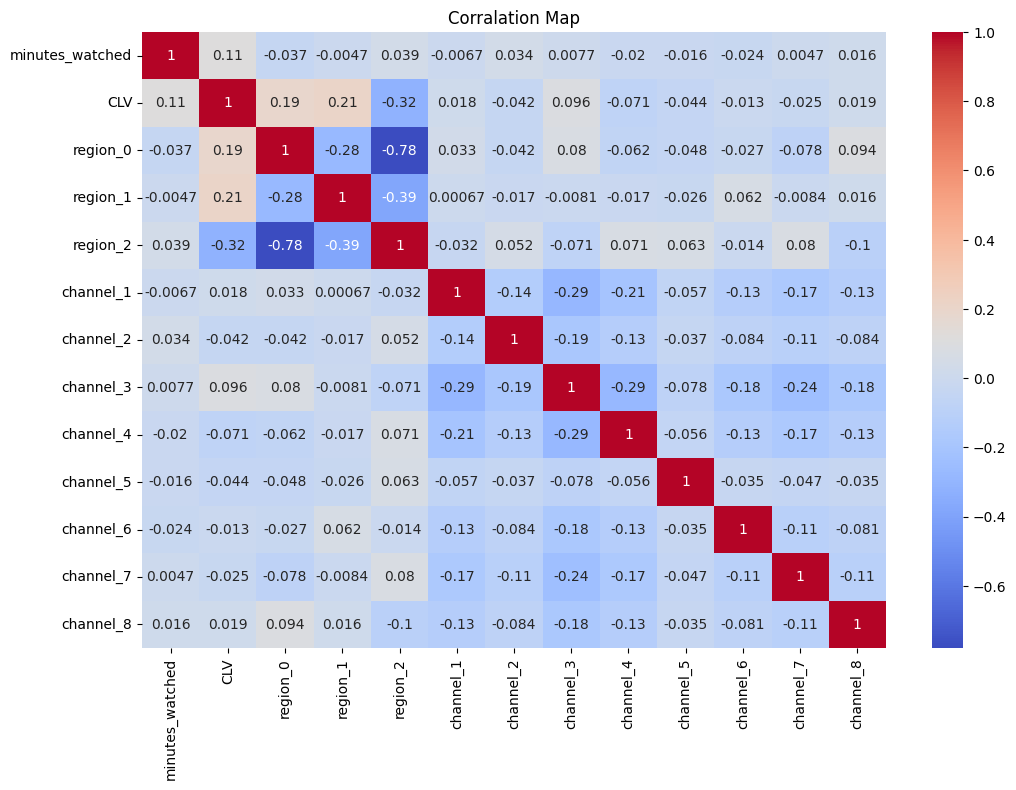

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title("Corralation Map")
plt.show()

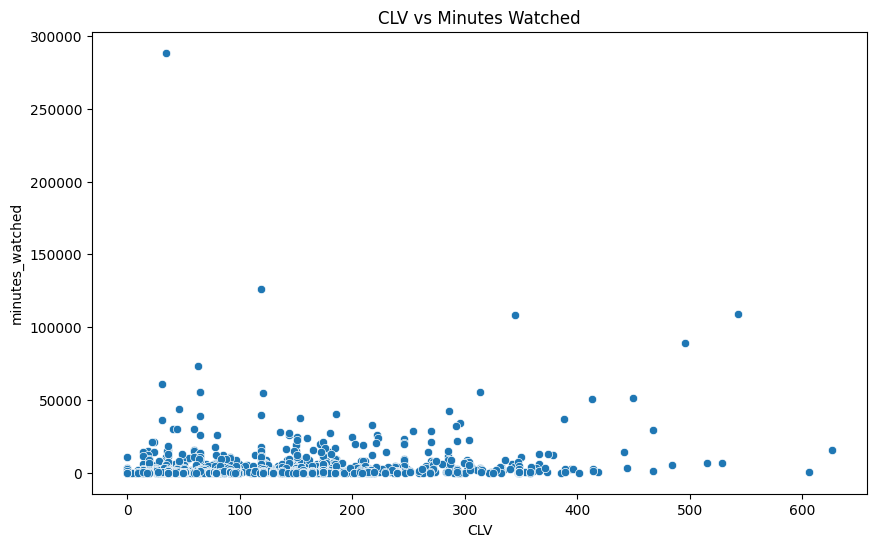

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CLV',y='minutes_watched',data=data)
plt.title('CLV vs Minutes Watched')
plt.show()

In [19]:
scaled= StandardScaler()
data_scaled=scaled.fit_transform(data)

In [20]:
data_scaled

array([[ 0.17542513,  1.23521866, -0.74396546, ..., -0.28552281,
        -0.37740094, -0.2849882 ],
       [-0.25376647,  0.44855443,  1.34414843, ..., -0.28552281,
        -0.37740094, -0.2849882 ],
       [-0.17954125,  0.00874342, -0.74396546, ..., -0.28552281,
        -0.37740094, -0.2849882 ],
       ...,
       [-0.25458815, -1.16919507, -0.74396546, ..., -0.28552281,
        -0.37740094, -0.2849882 ],
       [-0.25636846, -1.16919507, -0.74396546, ..., -0.28552281,
        -0.37740094, -0.2849882 ],
       [-0.26239413, -0.55893778,  1.34414843, ..., -0.28552281,
        -0.37740094, -0.2849882 ]])

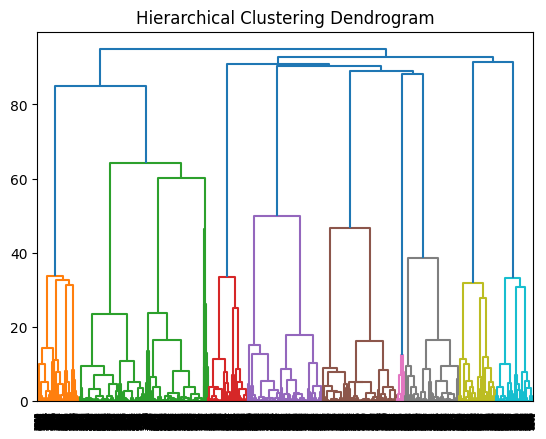

In [21]:
model_hierarchical=AgglomerativeClustering(n_clusters=None,distance_threshold=5)
linkage_matrix=ward(data_scaled)
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

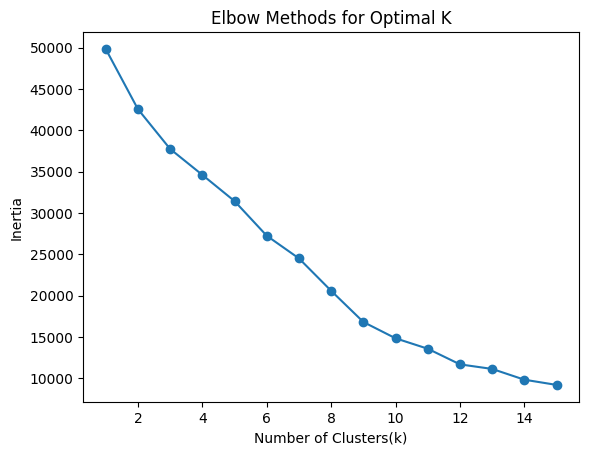

In [22]:
inertia=[]
for k in range(1,16):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)


plt.plot(range(1,16),inertia,marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.title('Elbow Methods for Optimal K')
plt.show()

In [23]:
kmeans=KMeans(n_clusters=9, random_state=42)
data['cluster']=kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
model_hierarchical=AgglomerativeClustering(n_clusters=9)
data['cluster_hierarchical']=model_hierarchical.fit_predict(data_scaled)

In [25]:
cluster_summary = data.groupby('cluster').agg({
    'CLV': 'mean',
    'minutes_watched': 'mean',
    'region_0': 'mean',
    'region_1': 'mean',
    'channel_1': 'mean',
    'channel_2': 'mean',
    'channel_3': 'mean'
}).reset_index()

In [26]:
data.head()

,minutes_watched,CLV,region_0,region_1,region_2,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,cluster,cluster_hierarchical
0,3197.0,205.42,0,0,1,0,0,0,1,0,0,0,0,2,6
1,63.0,149.99,1,0,0,1,0,0,0,0,0,0,0,1,2
2,605.0,119.00,0,0,1,0,1,0,0,0,0,0,0,3,4
3,20.0,240.00,0,0,1,0,0,0,1,0,0,0,0,2,6
4,245.0,184.36,0,1,0,0,0,0,1,0,0,0,0,2,3


In [27]:
cluster_summary

,cluster,CLV,minutes_watched,region_0,region_1,channel_1,channel_2,channel_3
0,0,149.729214,1523.389744,0.779487,0.217094,0.0,0.0,1.0
1,1,121.154173,1810.359165,0.390462,0.120715,1.0,0.0,0.0
2,2,107.368708,1589.376923,0.290769,0.107692,0.0,0.0,0.0
3,3,108.260359,2767.643791,0.287582,0.101307,0.0,1.0,0.0
4,4,105.275737,2558.060904,0.000000,0.000000,0.0,0.0,1.0
5,5,115.180277,1299.332180,0.311419,0.190311,0.0,0.0,0.0
6,6,113.654038,2006.190377,0.257322,0.112971,0.0,0.0,0.0
7,7,123.189965,2314.083333,0.513889,0.138889,0.0,0.0,0.0
8,8,93.151552,985.327586,0.172414,0.051724,0.0,0.0,0.0


In [28]:

data.head()

,minutes_watched,CLV,region_0,region_1,region_2,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,cluster,cluster_hierarchical
0,3197.0,205.42,0,0,1,0,0,0,1,0,0,0,0,2,6
1,63.0,149.99,1,0,0,1,0,0,0,0,0,0,0,1,2
2,605.0,119.00,0,0,1,0,1,0,0,0,0,0,0,3,4
3,20.0,240.00,0,0,1,0,0,0,1,0,0,0,0,2,6
4,245.0,184.36,0,1,0,0,0,0,1,0,0,0,0,2,3
